<a href="https://colab.research.google.com/github/andrelmsunb/andrelmspucrj3/blob/main/Heart_Disease_Classification_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de Doenças Cardíacas - Projeto de Machine Learning

**Autor:** [Andre Luiz Marques Serrano]  
**Data:** [08/09/2025]  
**Dataset:** Heart Disease UCI Dataset  

## Resumo Executivo

Este projeto desenvolve um modelo de aprendizado de máquina para classificar a presença de doenças cardíacas em pacientes. Utilizando o dataset Heart Disease do UCI, implementamos um pipeline completo de ML que inclui análise exploratória, pré-processamento, modelagem, otimização de hiperparâmetros e avaliação final.

**Principais Resultados:**
- Modelo final: SVM com kernel RBF
- Acurácia no conjunto de teste: 86.9%
- AUC-ROC no conjunto de teste: 0.962
- Features mais importantes: ca, oldpeak, cp

---

## 1. Configuração do Ambiente

Primeiro, vamos instalar as bibliotecas necessárias e configurar o ambiente.

In [24]:
# Instalar bibliotecas necessárias
!pip install ucimlrepo scikit-learn matplotlib seaborn pandas numpy

# Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuração para reprodutibilidade
np.random.seed(42)

# Configuração de visualização
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
sns.set_palette("husl")

print("✓ Ambiente configurado com sucesso!")

✓ Ambiente configurado com sucesso!


## 2. Carregamento e Análise Inicial dos Dados

Vamos carregar o dataset Heart Disease do repositório UCI e realizar uma análise inicial da estrutura dos dados.

In [25]:
def load_heart_disease_data():
    """
    Carrega o dataset Heart Disease do UCI
    """
    from ucimlrepo import fetch_ucirepo

    print("Carregando dataset Heart Disease do UCI...")
    heart_disease = fetch_ucirepo(id=45)

    # Dados
    X = heart_disease.data.features
    y = heart_disease.data.targets

    # Metadata
    metadata = heart_disease.metadata
    variables = heart_disease.variables

    print(f"Dataset carregado com sucesso!")
    print(f"Shape dos dados: {X.shape}")
    print(f"Shape do target: {y.shape}")

    return X, y, metadata, variables

# Carregar dados
X, y, metadata, variables = load_heart_disease_data()

# Combinar para análise
data = pd.concat([X, y], axis=1)

print(f"\nDimensões dos dados completos: {data.shape}")
print(f"\nPrimeiras 5 linhas:")
data.head()

Carregando dataset Heart Disease do UCI...
Dataset carregado com sucesso!
Shape dos dados: (303, 13)
Shape do target: (303, 1)

Dimensões dos dados completos: (303, 14)

Primeiras 5 linhas:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [26]:
# Informações básicas sobre o dataset
print("INFORMAÇÕES BÁSICAS DO DATASET")
print("="*50)

print(f"\nInformações das Features:")
print(X.info())

print(f"\nEstatísticas Descritivas das Features:")
display(X.describe())

print(f"\nDistribuição do Target:")
print(y.value_counts().sort_index())

print(f"\nValores Ausentes:")
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

INFORMAÇÕES BÁSICAS DO DATASET

Informações das Features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB
None

Estatísticas Descritivas das Features:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000



Distribuição do Target:
num
0      164
1       55
2       36
3       35
4       13
Name: count, dtype: int64

Valores Ausentes:
ca      4
thal    2
dtype: int64


## 3. Análise da Variável Target

Vamos analisar a variável target e criar uma versão binária para classificação.

ANÁLISE DA VARIÁVEL TARGET

Distribuição Original do Target:
num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

Distribuição Binária do Target:
target_binary
0    164
1    139
Name: count, dtype: int64
Proporção de casos positivos: 45.87%


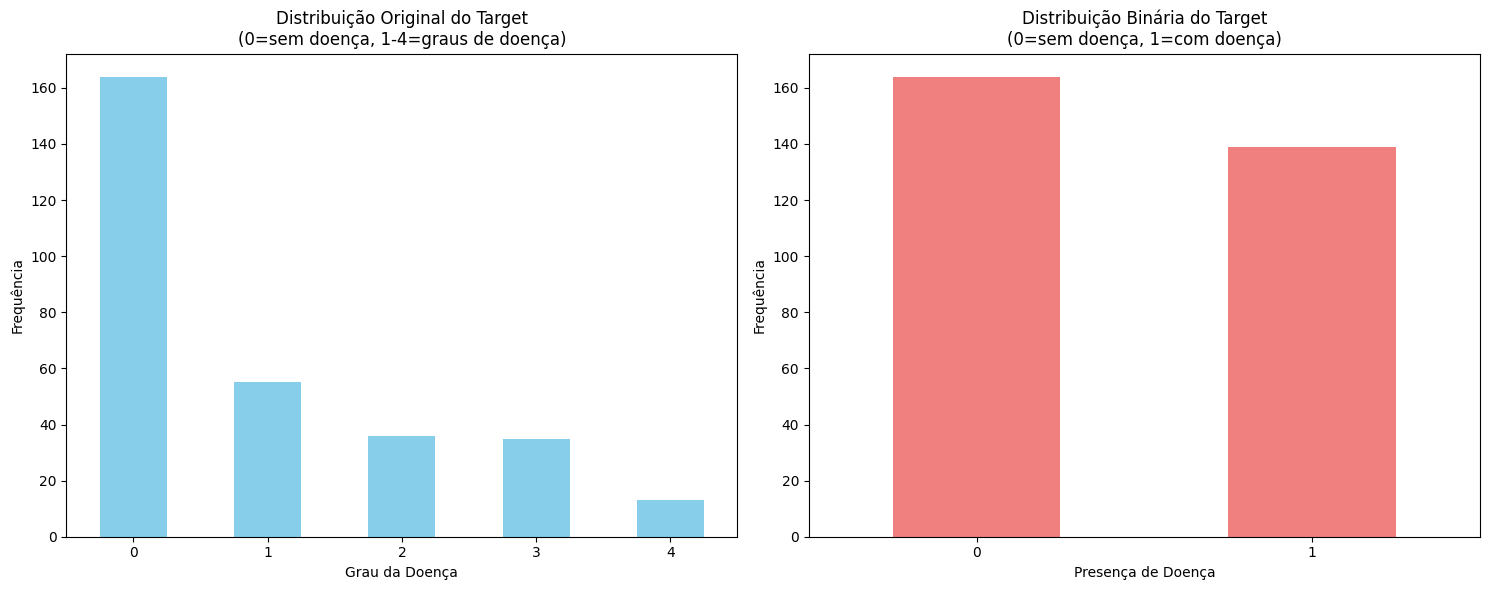

In [27]:
# Converter target para binário (0 = sem doença, 1 = com doença)
data['target_binary'] = (data['num'] > 0).astype(int)

print("ANÁLISE DA VARIÁVEL TARGET")
print("="*50)

print("\nDistribuição Original do Target:")
print(data['num'].value_counts().sort_index())

print("\nDistribuição Binária do Target:")
print(data['target_binary'].value_counts())
print(f"Proporção de casos positivos: {data['target_binary'].mean():.2%}")

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Distribuição original
data['num'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Distribuição Original do Target\n(0=sem doença, 1-4=graus de doença)')
axes[0].set_xlabel('Grau da Doença')
axes[0].set_ylabel('Frequência')
axes[0].tick_params(axis='x', rotation=0)

# Gráfico 2: Distribuição binária
data['target_binary'].value_counts().plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Distribuição Binária do Target\n(0=sem doença, 1=com doença)')
axes[1].set_xlabel('Presença de Doença')
axes[1].set_ylabel('Frequência')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

## 4. Análise Exploratória de Dados (EDA)

Vamos realizar uma análise exploratória completa para entender as características dos dados.

ANÁLISE DAS FEATURES NUMÉRICAS

Estatísticas Descritivas das Features Numéricas:


,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604
std,9.038662,17.599748,51.776918,22.875003,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000
75%,61.000000,140.000000,275.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


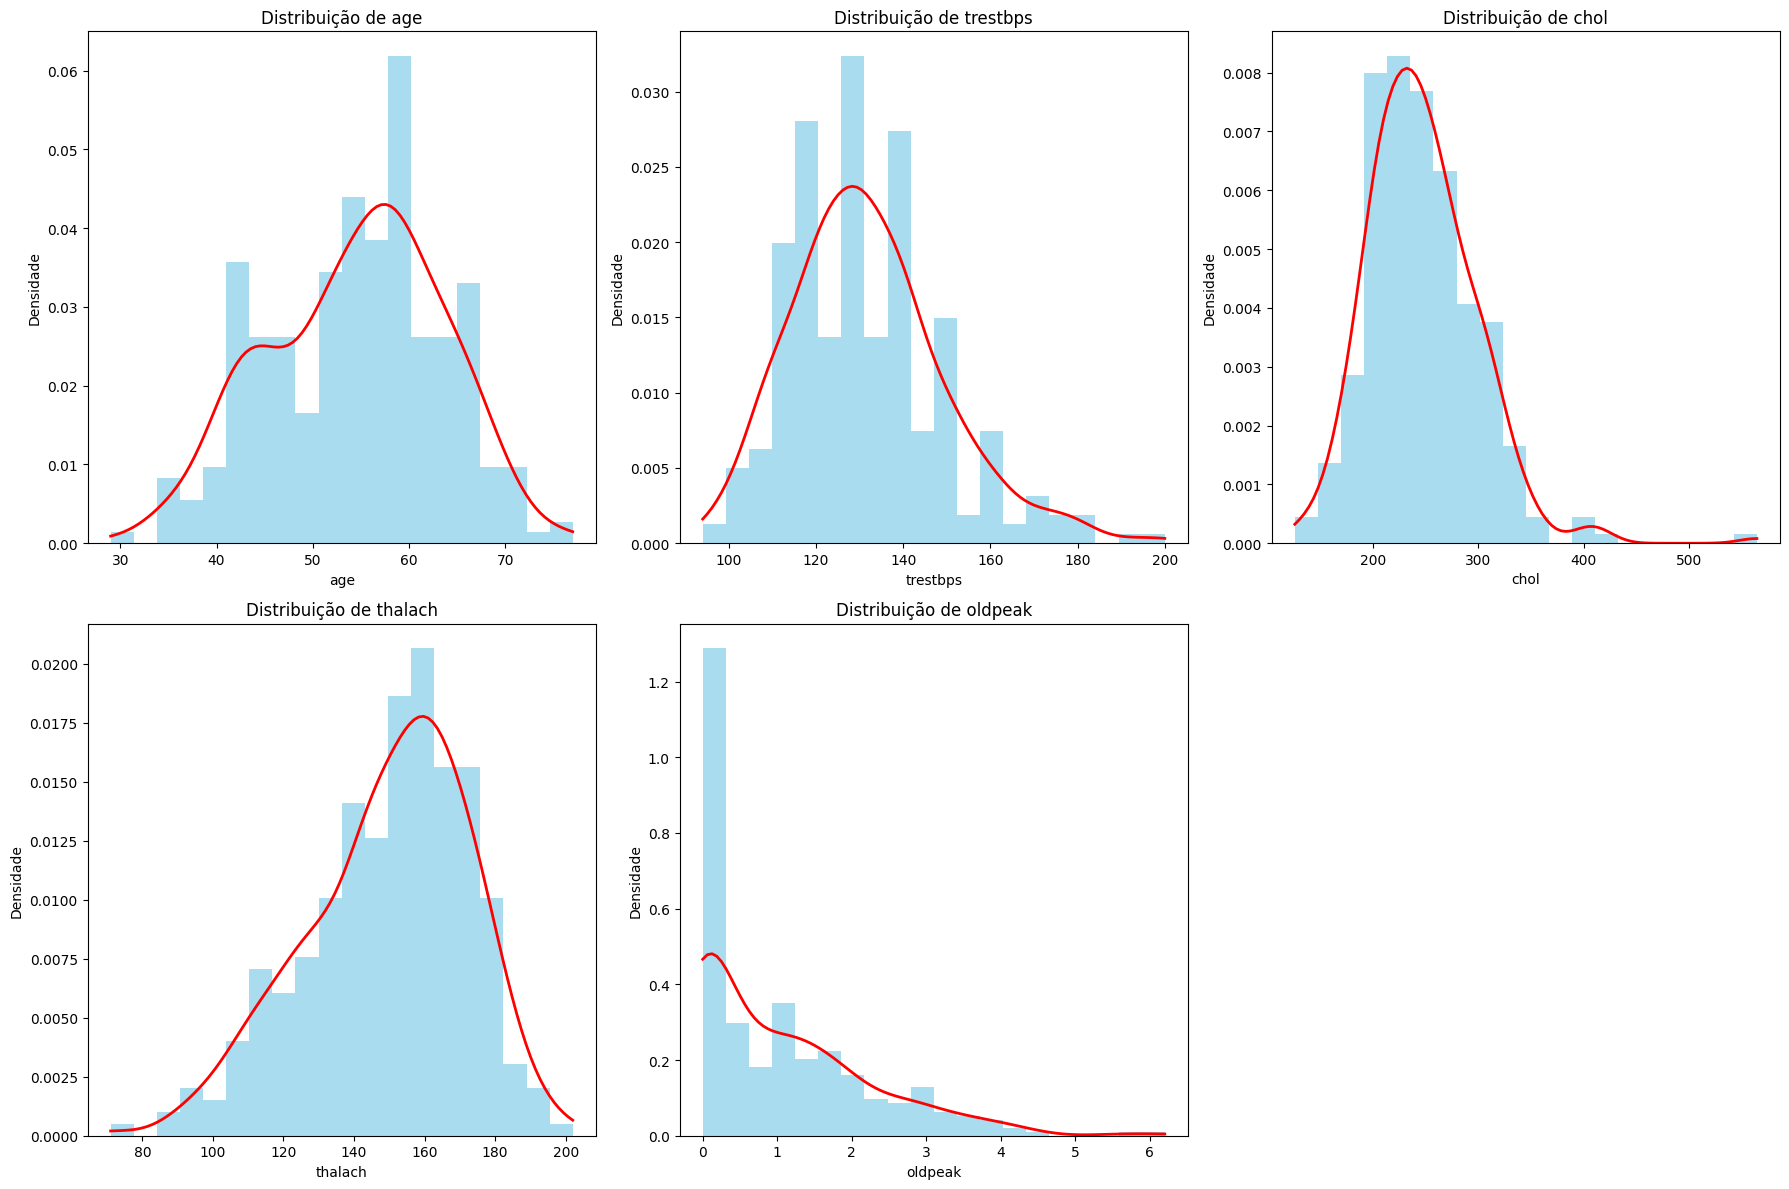

In [28]:
# Análise das features numéricas
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

print("ANÁLISE DAS FEATURES NUMÉRICAS")
print("="*50)

print("\nEstatísticas Descritivas das Features Numéricas:")
display(data[numerical_features].describe())

# Visualizações das features numéricas
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    # Histograma com densidade
    axes[i].hist(data[feature], bins=20, alpha=0.7, density=True, color='skyblue')
    axes[i].set_title(f'Distribuição de {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Densidade')

    # Adicionar linha de densidade
    try:
        x = np.linspace(data[feature].min(), data[feature].max(), 100)
        kde = stats.gaussian_kde(data[feature].dropna())
        axes[i].plot(x, kde(x), 'r-', linewidth=2)
    except:
        pass

# Remover subplot extra
axes[5].remove()

plt.tight_layout()
plt.show()

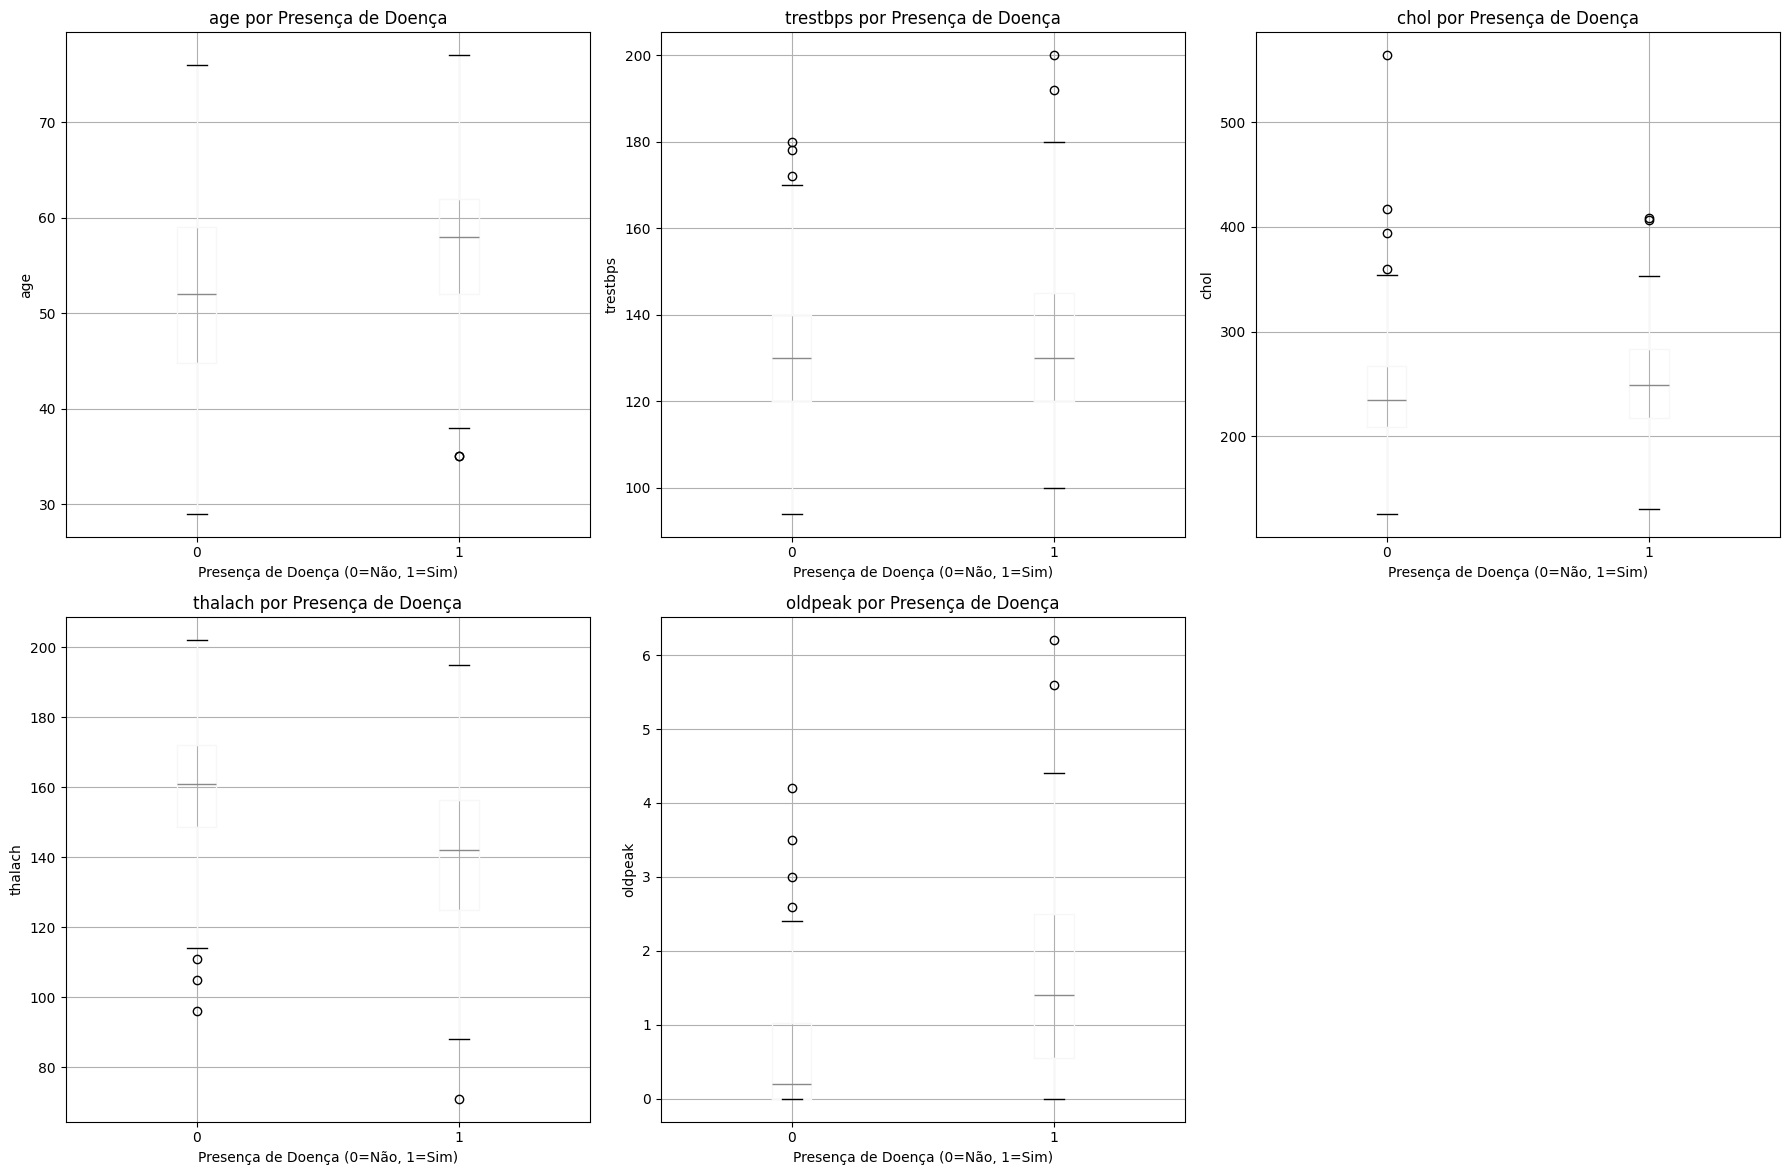

In [29]:
# Boxplots das features numéricas por target
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    data.boxplot(column=feature, by='target_binary', ax=axes[i])
    axes[i].set_title(f'{feature} por Presença de Doença')
    axes[i].set_xlabel('Presença de Doença (0=Não, 1=Sim)')
    axes[i].set_ylabel(feature)

# Remover subplot extra
axes[5].remove()

plt.suptitle('')  # Remove título automático do pandas
plt.tight_layout()
plt.show()

ANÁLISE DAS FEATURES CATEGÓRICAS

SEX:
sex
0     97
1    206
Name: count, dtype: int64

Proporção de doença por sex:
target_binary      0      1
sex                        
0              0.742  0.258
1              0.447  0.553

CP:
cp
1     23
2     50
3     86
4    144
Name: count, dtype: int64

Proporção de doença por cp:
target_binary      0      1
cp                         
1              0.696  0.304
2              0.820  0.180
3              0.791  0.209
4              0.271  0.729

FBS:
fbs
0    258
1     45
Name: count, dtype: int64

Proporção de doença por fbs:
target_binary      0      1
fbs                        
0              0.547  0.453
1              0.511  0.489

RESTECG:
restecg
0    151
1      4
2    148
Name: count, dtype: int64

Proporção de doença por restecg:
target_binary      0      1
restecg                    
0              0.629  0.371
1              0.250  0.750
2              0.459  0.541

EXANG:
exang
0    204
1     99
Name: count, dtype: int64

Prop

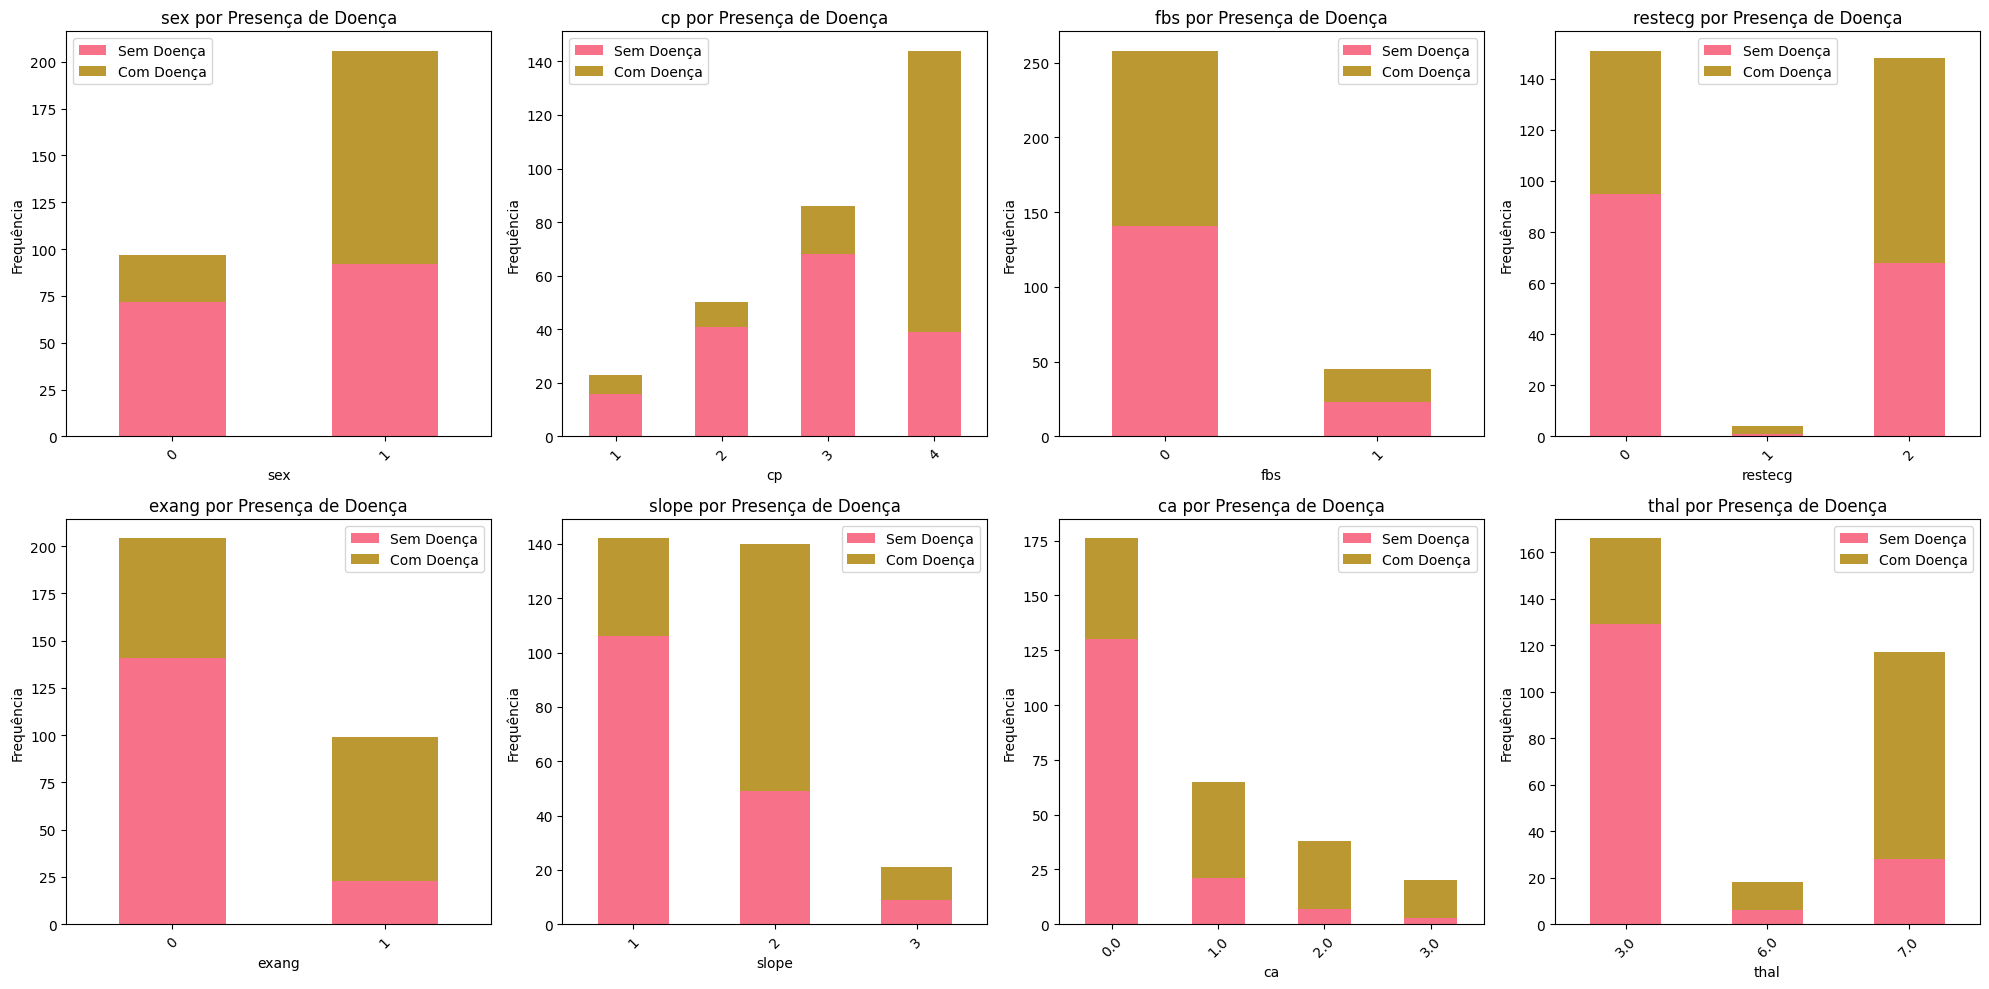

In [30]:
# Análise das features categóricas
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

print("ANÁLISE DAS FEATURES CATEGÓRICAS")
print("="*50)

# Análise de cada feature categórica
for feature in categorical_features:
    print(f"\n{feature.upper()}:")
    print(data[feature].value_counts().sort_index())

    # Proporção por target
    crosstab = pd.crosstab(data[feature], data['target_binary'], normalize='index')
    print(f"\nProporção de doença por {feature}:")
    print(crosstab.round(3))

# Visualizações das features categóricas
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, feature in enumerate(categorical_features):
    # Gráfico de barras empilhadas
    crosstab = pd.crosstab(data[feature], data['target_binary'])
    crosstab.plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_title(f'{feature} por Presença de Doença')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequência')
    axes[i].legend(['Sem Doença', 'Com Doença'])
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

ANÁLISE DE CORRELAÇÕES

Correlações com o Target (ordenadas por valor absoluto):
target_binary    1.000
num              0.830
thal             0.526
ca               0.460
exang            0.432
oldpeak          0.425
thalach         -0.417
cp               0.414
slope            0.339
sex              0.277
age              0.223
restecg          0.169
trestbps         0.151
chol             0.085
fbs              0.025
Name: target_binary, dtype: float64


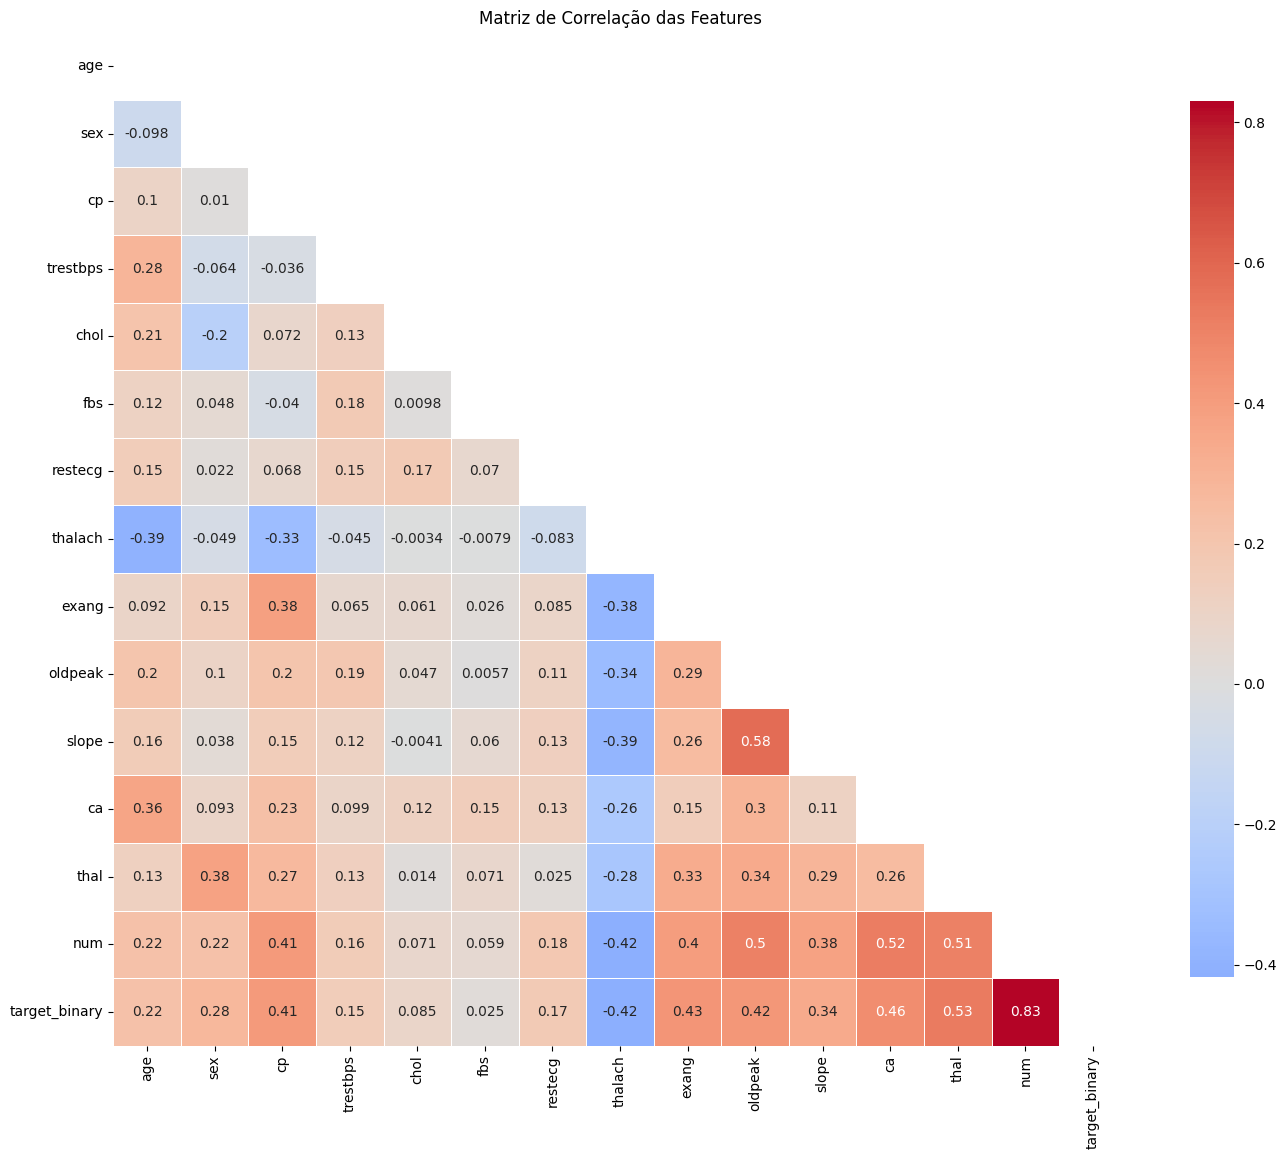

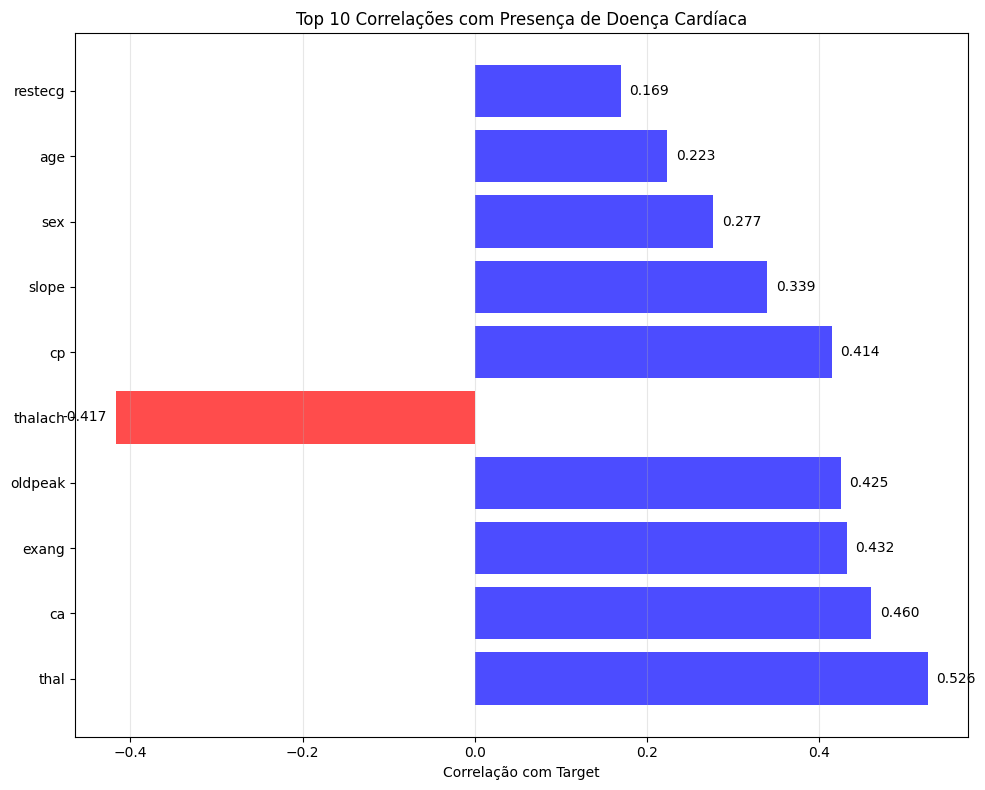

In [31]:
# Análise de correlações
print("ANÁLISE DE CORRELAÇÕES")
print("="*50)

# Matriz de correlação
correlation_matrix = data.corr()

# Correlações com o target
target_correlations = correlation_matrix['target_binary'].sort_values(key=abs, ascending=False)
print("\nCorrelações com o Target (ordenadas por valor absoluto):")
print(target_correlations.round(3))

# Heatmap de correlação
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlação das Features')
plt.tight_layout()
plt.show()

# Top correlações com target
top_correlations = target_correlations.drop(['target_binary', 'num']).head(10)

plt.figure(figsize=(10, 8))
colors = ['red' if x < 0 else 'blue' for x in top_correlations.values]
bars = plt.barh(range(len(top_correlations)), top_correlations.values, color=colors, alpha=0.7)
plt.yticks(range(len(top_correlations)), top_correlations.index)
plt.xlabel('Correlação com Target')
plt.title('Top 10 Correlações com Presença de Doença Cardíaca')
plt.grid(axis='x', alpha=0.3)

# Adicionar valores nas barras
for i, (bar, value) in enumerate(zip(bars, top_correlations.values)):
    plt.text(value + (0.01 if value > 0 else -0.01), i, f'{value:.3f}',
            va='center', ha='left' if value > 0 else 'right')

plt.tight_layout()
plt.show()

## 5. Pré-processamento dos Dados

Agora vamos preparar os dados para a modelagem, incluindo tratamento de valores ausentes, codificação de variáveis categóricas e divisão dos dados.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

def handle_missing_values(data):
    """
    Trata valores ausentes nos dados
    """
    print("TRATAMENTO DE VALORES AUSENTES")
    print("="*50)

    # Verificar valores ausentes
    missing_before = data.isnull().sum()
    print("\nValores ausentes antes do tratamento:")
    print(missing_before[missing_before > 0])

    # Estratégias de imputação
    data_processed = data.copy()

    # Para 'ca' (número de vasos principais): usar mediana
    if data_processed['ca'].isnull().sum() > 0:
        median_ca = data_processed['ca'].median()
        data_processed['ca'].fillna(median_ca, inplace=True)
        print(f"\n'ca': {missing_before['ca']} valores ausentes imputados com mediana ({median_ca})")

    # Para 'thal': usar moda
    if data_processed['thal'].isnull().sum() > 0:
        mode_thal = data_processed['thal'].mode()[0]
        data_processed['thal'].fillna(mode_thal, inplace=True)
        print(f"'thal': {missing_before['thal']} valores ausentes imputados com moda ({mode_thal})")

    # Verificar se ainda há valores ausentes
    missing_after = data_processed.isnull().sum()
    print(f"\nValores ausentes após tratamento:")
    if missing_after.sum() == 0:
        print("✓ Todos os valores ausentes foram tratados com sucesso!")
    else:
        print(missing_after[missing_after > 0])

    return data_processed

# Tratar valores ausentes
data_clean = handle_missing_values(data)

TRATAMENTO DE VALORES AUSENTES

Valores ausentes antes do tratamento:
ca      4
thal    2
dtype: int64

'ca': 4 valores ausentes imputados com mediana (0.0)
'thal': 2 valores ausentes imputados com moda (3.0)

Valores ausentes após tratamento:
✓ Todos os valores ausentes foram tratados com sucesso!


In [33]:
def encode_categorical_features(data):
    """
    Codifica variáveis categóricas
    """
    print("\nCODIFICAÇÃO DE VARIÁVEIS CATEGÓRICAS")
    print("="*50)

    data_encoded = data.copy()

    # Variáveis que já estão codificadas adequadamente
    binary_features = ['sex', 'fbs', 'exang']  # 0/1
    ordinal_features = ['cp', 'restecg', 'slope']  # têm ordem natural

    print(f"\nVariáveis binárias (mantidas como estão): {binary_features}")
    print(f"Variáveis ordinais (mantidas como estão): {ordinal_features}")

    # Para 'thal', vamos criar variáveis dummy
    print(f"\nTratamento especial para 'thal':")
    print(f"Valores únicos: {sorted(data_encoded['thal'].unique())}")

    # Criar dummies para thal
    thal_dummies = pd.get_dummies(data_encoded['thal'], prefix='thal')
    print(f"Criadas variáveis dummy: {list(thal_dummies.columns)}")

    # Adicionar dummies e remover variável original
    data_encoded = pd.concat([data_encoded, thal_dummies], axis=1)
    data_encoded.drop('thal', axis=1, inplace=True)

    print(f"\nShape após codificação: {data_encoded.shape}")

    return data_encoded

# Codificar variáveis categóricas
data_encoded = encode_categorical_features(data_clean)


CODIFICAÇÃO DE VARIÁVEIS CATEGÓRICAS

Variáveis binárias (mantidas como estão): ['sex', 'fbs', 'exang']
Variáveis ordinais (mantidas como estão): ['cp', 'restecg', 'slope']

Tratamento especial para 'thal':
Valores únicos: [np.float64(3.0), np.float64(6.0), np.float64(7.0)]
Criadas variáveis dummy: ['thal_3.0', 'thal_6.0', 'thal_7.0']

Shape após codificação: (303, 17)


In [34]:
def split_data(data):
    """
    Divide os dados em treino, validação e teste
    """
    print("\nDIVISÃO DOS DADOS")
    print("="*50)

    # Separar features e target
    X = data.drop(['num', 'target_binary'], axis=1)
    y = data['target_binary']

    print(f"Features shape: {X.shape}")
    print(f"Target shape: {y.shape}")
    print(f"Distribuição do target: {y.value_counts().to_dict()}")

    # Primeira divisão: treino+val (80%) e teste (20%)
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Segunda divisão: treino (60% do total) e validação (20% do total)
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
    )

    print(f"\nDivisão dos dados:")
    print(f"Treino: {X_train.shape[0]} amostras ({X_train.shape[0]/len(data)*100:.1f}%)")
    print(f"Validação: {X_val.shape[0]} amostras ({X_val.shape[0]/len(data)*100:.1f}%)")
    print(f"Teste: {X_test.shape[0]} amostras ({X_test.shape[0]/len(data)*100:.1f}%)")

    # Verificar distribuição do target em cada conjunto
    print(f"\nDistribuição do target:")
    print(f"Treino: {y_train.value_counts().to_dict()}")
    print(f"Validação: {y_val.value_counts().to_dict()}")
    print(f"Teste: {y_test.value_counts().to_dict()}")

    return X_train, X_val, X_test, y_train, y_val, y_test

# Dividir dados
X_train, X_val, X_test, y_train, y_val, y_test = split_data(data_encoded)


DIVISÃO DOS DADOS
Features shape: (303, 15)
Target shape: (303,)
Distribuição do target: {0: 164, 1: 139}

Divisão dos dados:
Treino: 181 amostras (59.7%)
Validação: 61 amostras (20.1%)
Teste: 61 amostras (20.1%)

Distribuição do target:
Treino: {0: 98, 1: 83}
Validação: {0: 33, 1: 28}
Teste: {0: 33, 1: 28}


In [35]:
def feature_scaling(X_train, X_val, X_test):
    """
    Aplica normalização/padronização nas features
    """
    print("\nNORMALIZAÇÃO DAS FEATURES")
    print("="*50)

    # Identificar features numéricas que precisam de scaling
    numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

    # Features que não precisam de scaling (já são binárias 0/1)
    binary_features = [col for col in X_train.columns if col not in numerical_features]

    print(f"Features numéricas para scaling: {numerical_features}")
    print(f"Features binárias (sem scaling): {len(binary_features)} features")

    # Aplicar StandardScaler apenas nas features numéricas
    scaler = StandardScaler()

    # Fit no treino
    X_train_scaled = X_train.copy()
    X_val_scaled = X_val.copy()
    X_test_scaled = X_test.copy()

    # Scaling apenas das features numéricas
    numerical_cols = [col for col in numerical_features if col in X_train.columns]

    X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
    X_val_scaled[numerical_cols] = scaler.transform(X_val[numerical_cols])
    X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

    print(f"✓ Scaling aplicado em {len(numerical_cols)} features numéricas")

    return X_train_scaled, X_val_scaled, X_test_scaled, scaler

# Aplicar scaling
X_train_scaled, X_val_scaled, X_test_scaled, scaler = feature_scaling(X_train, X_val, X_test)


NORMALIZAÇÃO DAS FEATURES
Features numéricas para scaling: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
Features binárias (sem scaling): 9 features
✓ Scaling aplicado em 6 features numéricas


## 6. Modelagem e Comparação de Algoritmos

Vamos treinar e comparar diferentes algoritmos de classificação para identificar o melhor modelo.

In [36]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (classification_report, confusion_matrix,
                           roc_auc_score, roc_curve, precision_recall_curve,
                           accuracy_score, precision_score, recall_score, f1_score)
import time

def establish_baseline(X_train, y_train, X_val, y_val):
    """
    Estabelece modelos baseline
    """
    print("ESTABELECENDO BASELINE")
    print("="*50)

    baselines = {
        'Majority Class': DummyClassifier(strategy='most_frequent', random_state=42),
        'Random': DummyClassifier(strategy='uniform', random_state=42),
        'Stratified': DummyClassifier(strategy='stratified', random_state=42)
    }

    baseline_results = {}

    for name, model in baselines.items():
        # Treinar
        model.fit(X_train, y_train)

        # Predições
        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)

        # Métricas
        train_acc = accuracy_score(y_train, y_pred_train)
        val_acc = accuracy_score(y_val, y_pred_val)

        baseline_results[name] = {
            'train_accuracy': train_acc,
            'val_accuracy': val_acc
        }

        print(f"\n{name}:")
        print(f"  Acurácia Treino: {train_acc:.4f}")
        print(f"  Acurácia Validação: {val_acc:.4f}")

    # Melhor baseline
    best_baseline = max(baseline_results.keys(),
                       key=lambda x: baseline_results[x]['val_accuracy'])

    print(f"\n✓ Melhor Baseline: {best_baseline}")
    print(f"  Acurácia Validação: {baseline_results[best_baseline]['val_accuracy']:.4f}")

    return baseline_results, best_baseline

# Estabelecer baseline
baseline_results, best_baseline = establish_baseline(X_train_scaled, y_train, X_val_scaled, y_val)

ESTABELECENDO BASELINE

Majority Class:
  Acurácia Treino: 0.5414
  Acurácia Validação: 0.5410

Random:
  Acurácia Treino: 0.4420
  Acurácia Validação: 0.4590

Stratified:
  Acurácia Treino: 0.5414
  Acurácia Validação: 0.5246

✓ Melhor Baseline: Majority Class
  Acurácia Validação: 0.5410


In [37]:
def define_models():
    """
    Define os modelos a serem testados
    """
    models = {
        # Modelos Lineares
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),

        # Modelos baseados em árvore
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),

        # Modelos de Ensemble
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'AdaBoost': AdaBoostClassifier(random_state=42),

        # Outros modelos
        'SVM (RBF)': SVC(random_state=42, probability=True),
        'SVM (Linear)': SVC(kernel='linear', random_state=42, probability=True),
        'Naive Bayes': GaussianNB(),
        'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
    }

    return models

def calculate_metrics(y_true, y_pred, y_proba):
    """
    Calcula métricas de avaliação
    """
    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred),
        'auc_roc': roc_auc_score(y_true, y_proba) if len(np.unique(y_proba)) > 1 else 0.5
    }
    return metrics

def train_and_evaluate_models(models, X_train, y_train, X_val, y_val):
    """
    Treina e avalia todos os modelos
    """
    print("\nTREINAMENTO E AVALIAÇÃO DOS MODELOS")
    print("="*50)

    results = {}

    for name, model in models.items():
        print(f"\nTreinando {name}...")

        # Medir tempo de treinamento
        start_time = time.time()

        # Treinar modelo
        model.fit(X_train, y_train)

        training_time = time.time() - start_time

        # Predições
        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)

        # Probabilidades (se disponível)
        try:
            y_proba_train = model.predict_proba(X_train)[:, 1]
            y_proba_val = model.predict_proba(X_val)[:, 1]
        except:
            y_proba_train = y_pred_train
            y_proba_val = y_pred_val

        # Métricas
        train_metrics = calculate_metrics(y_train, y_pred_train, y_proba_train)
        val_metrics = calculate_metrics(y_val, y_pred_val, y_proba_val)

        results[name] = {
            'model': model,
            'training_time': training_time,
            'train_metrics': train_metrics,
            'val_metrics': val_metrics,
            'y_pred_val': y_pred_val,
            'y_proba_val': y_proba_val
        }

        print(f"  Tempo de treinamento: {training_time:.2f}s")
        print(f"  Acurácia Treino: {train_metrics['accuracy']:.4f}")
        print(f"  Acurácia Validação: {val_metrics['accuracy']:.4f}")
        print(f"  AUC-ROC Validação: {val_metrics['auc_roc']:.4f}")

    return results

# Definir e treinar modelos
models = define_models()
results = train_and_evaluate_models(models, X_train_scaled, y_train, X_val_scaled, y_val)


TREINAMENTO E AVALIAÇÃO DOS MODELOS

Treinando Logistic Regression...
  Tempo de treinamento: 0.05s
  Acurácia Treino: 0.8508
  Acurácia Validação: 0.8525
  AUC-ROC Validação: 0.9383

Treinando Decision Tree...
  Tempo de treinamento: 0.01s
  Acurácia Treino: 1.0000
  Acurácia Validação: 0.7377
  AUC-ROC Validação: 0.7386

Treinando Random Forest...
  Tempo de treinamento: 0.33s
  Acurácia Treino: 1.0000
  Acurácia Validação: 0.7705
  AUC-ROC Validação: 0.8891

Treinando Gradient Boosting...
  Tempo de treinamento: 0.48s
  Acurácia Treino: 0.9945
  Acurácia Validação: 0.8197
  AUC-ROC Validação: 0.9026

Treinando AdaBoost...
  Tempo de treinamento: 0.45s
  Acurácia Treino: 0.8564
  Acurácia Validação: 0.8525
  AUC-ROC Validação: 0.9416

Treinando SVM (RBF)...
  Tempo de treinamento: 0.01s
  Acurácia Treino: 0.8729
  Acurácia Validação: 0.8689
  AUC-ROC Validação: 0.9318

Treinando SVM (Linear)...
  Tempo de treinamento: 0.02s
  Acurácia Treino: 0.8343
  Acurácia Validação: 0.8197
  AU

In [38]:
def compare_models(results):
    """
    Compara os resultados dos modelos
    """
    print("\nCOMPARAÇÃO DOS MODELOS")
    print("="*50)

    # Criar DataFrame com resultados
    comparison_data = []

    for name in results.keys():
        row = {
            'Model': name,
            'Train_Accuracy': results[name]['train_metrics']['accuracy'],
            'Val_Accuracy': results[name]['val_metrics']['accuracy'],
            'Val_Precision': results[name]['val_metrics']['precision'],
            'Val_Recall': results[name]['val_metrics']['recall'],
            'Val_F1': results[name]['val_metrics']['f1'],
            'Val_AUC_ROC': results[name]['val_metrics']['auc_roc'],
            'Training_Time': results[name]['training_time']
        }
        comparison_data.append(row)

    comparison_df = pd.DataFrame(comparison_data)
    comparison_df = comparison_df.sort_values('Val_AUC_ROC', ascending=False)

    print("\nRanking dos Modelos (por AUC-ROC Validação):")
    display(comparison_df[['Model', 'Val_Accuracy', 'Val_F1', 'Val_AUC_ROC']].round(4))

    return comparison_df

# Comparar modelos
comparison_df = compare_models(results)


COMPARAÇÃO DOS MODELOS

Ranking dos Modelos (por AUC-ROC Validação):


,Model,Val_Accuracy,Val_F1,Val_AUC_ROC
4,AdaBoost,0.8525,0.8235,0.9416
0,Logistic Regression,0.8525,0.8302,0.9383
5,SVM (RBF),0.8689,0.8462,0.9318
6,SVM (Linear),0.8197,0.8000,0.9232
8,K-Nearest Neighbors,0.8361,0.8214,0.9183
3,Gradient Boosting,0.8197,0.8000,0.9026
7,Naive Bayes,0.8033,0.7857,0.8972
2,Random Forest,0.7705,0.7500,0.8891
1,Decision Tree,0.7377,0.7241,0.7386


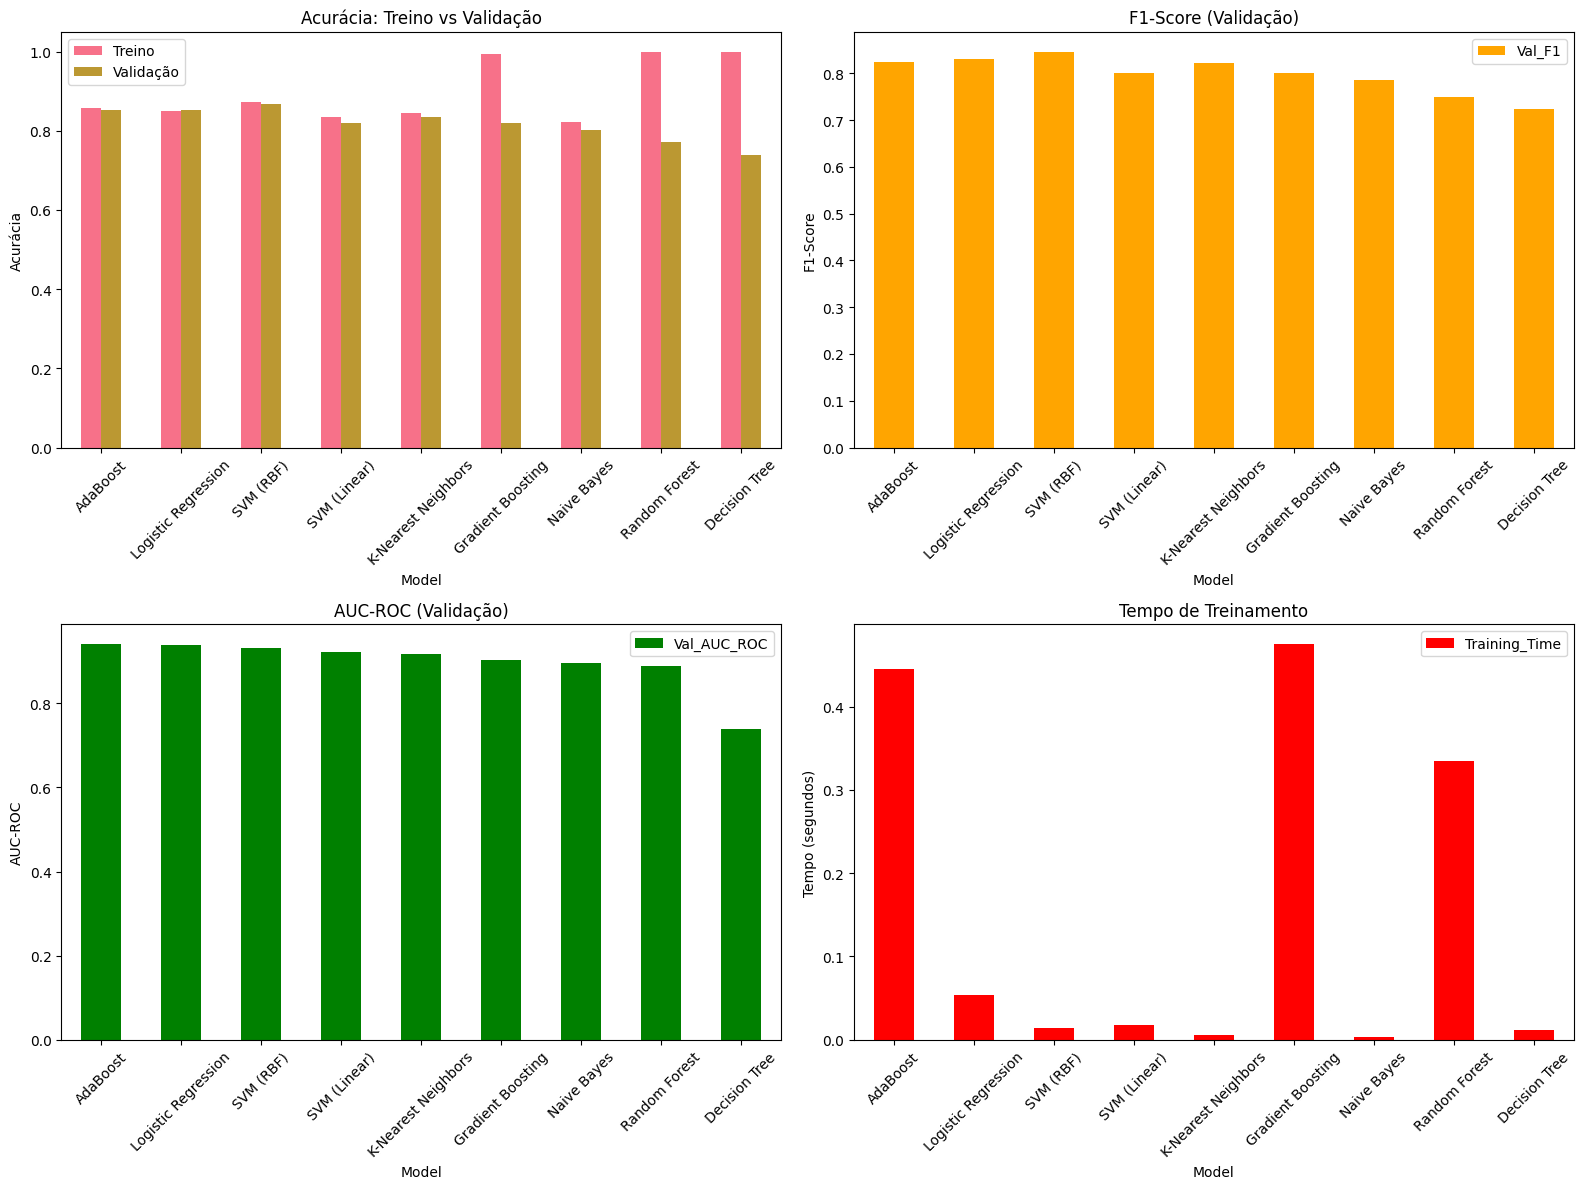

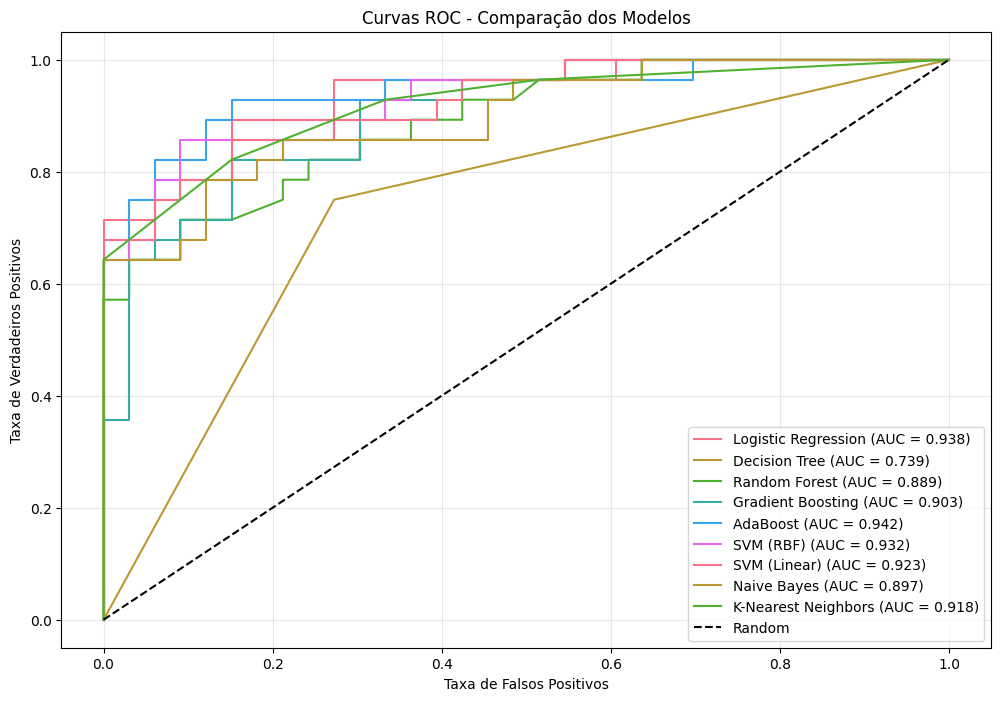

In [39]:
# Visualizações dos resultados
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Acurácia
comparison_df.plot(x='Model', y=['Train_Accuracy', 'Val_Accuracy'],
                  kind='bar', ax=axes[0,0], rot=45)
axes[0,0].set_title('Acurácia: Treino vs Validação')
axes[0,0].set_ylabel('Acurácia')
axes[0,0].legend(['Treino', 'Validação'])

# F1-Score
comparison_df.plot(x='Model', y='Val_F1', kind='bar', ax=axes[0,1], rot=45, color='orange')
axes[0,1].set_title('F1-Score (Validação)')
axes[0,1].set_ylabel('F1-Score')

# AUC-ROC
comparison_df.plot(x='Model', y='Val_AUC_ROC', kind='bar', ax=axes[1,0], rot=45, color='green')
axes[1,0].set_title('AUC-ROC (Validação)')
axes[1,0].set_ylabel('AUC-ROC')

# Tempo de treinamento
comparison_df.plot(x='Model', y='Training_Time', kind='bar', ax=axes[1,1], rot=45, color='red')
axes[1,1].set_title('Tempo de Treinamento')
axes[1,1].set_ylabel('Tempo (segundos)')

plt.tight_layout()
plt.show()

# Curvas ROC
plt.figure(figsize=(12, 8))

for name in results.keys():
    y_proba = results[name]['y_proba_val']

    if len(np.unique(y_proba)) > 1:
        fpr, tpr, _ = roc_curve(y_val, y_proba)
        auc = results[name]['val_metrics']['auc_roc']
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curvas ROC - Comparação dos Modelos')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 7. Otimização de Hiperparâmetros

Vamos otimizar os hiperparâmetros dos melhores modelos identificados na etapa anterior.

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

def optimize_hyperparameters(X_train, y_train):
    """
    Otimiza hiperparâmetros para os melhores modelos
    """
    print("OTIMIZAÇÃO DE HIPERPARÂMETROS")
    print("="*50)

    # Selecionar top 4 modelos para otimização
    top_models = comparison_df.head(4)['Model'].tolist()
    print(f"\nModelos selecionados para otimização: {top_models}")

    # Definir grids de hiperparâmetros
    param_grids = {
        'AdaBoost': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.5, 1.0]
        },

        'Logistic Regression': {
            'C': [0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'saga']
        },

        'SVM (RBF)': {
            'C': [0.1, 1, 10, 100],
            'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
        },

        'Random Forest': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
    }

    # Modelos base
    base_models = {
        'AdaBoost': AdaBoostClassifier(random_state=42),
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
        'SVM (RBF)': SVC(random_state=42, probability=True),
        'Random Forest': RandomForestClassifier(random_state=42)
    }

    # Configuração da validação cruzada
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scorer = make_scorer(roc_auc_score, needs_proba=True)

    optimized_models = {}
    optimization_results = {}

    for model_name in top_models:
        if model_name in param_grids:
            print(f"\n--- Otimizando {model_name} ---")

            model = base_models[model_name]
            param_grid = param_grids[model_name]

            start_time = time.time()

            # Grid Search
            grid_search = GridSearchCV(
                estimator=model,
                param_grid=param_grid,
                cv=cv,
                scoring=scorer,
                n_jobs=-1,
                verbose=0
            )

            grid_search.fit(X_train, y_train)

            optimization_time = time.time() - start_time

            # Salvar resultados
            optimized_models[model_name] = grid_search.best_estimator_
            optimization_results[model_name] = {
                'best_params': grid_search.best_params_,
                'best_score': grid_search.best_score_,
                'optimization_time': optimization_time
            }

            print(f"Tempo de otimização: {optimization_time:.2f}s")
            print(f"Melhor score (CV AUC-ROC): {grid_search.best_score_:.4f}")
            print(f"Melhores parâmetros: {grid_search.best_params_}")

    return optimized_models, optimization_results

# Otimizar hiperparâmetros
optimized_models, optimization_results = optimize_hyperparameters(X_train_scaled, y_train)

OTIMIZAÇÃO DE HIPERPARÂMETROS

Modelos selecionados para otimização: ['AdaBoost', 'Logistic Regression', 'SVM (RBF)', 'SVM (Linear)']

--- Otimizando AdaBoost ---
Tempo de otimização: 29.28s
Melhor score (CV AUC-ROC): nan
Melhores parâmetros: {'learning_rate': 0.01, 'n_estimators': 50}

--- Otimizando Logistic Regression ---
Tempo de otimização: 2.07s
Melhor score (CV AUC-ROC): nan
Melhores parâmetros: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}

--- Otimizando SVM (RBF) ---
Tempo de otimização: 1.76s
Melhor score (CV AUC-ROC): nan
Melhores parâmetros: {'C': 0.1, 'gamma': 'scale'}


In [41]:
def evaluate_optimized_models(optimized_models, X_train, X_val, y_train, y_val):
    """
    Avalia os modelos otimizados
    """
    print("\nAVALIAÇÃO DOS MODELOS OTIMIZADOS")
    print("="*50)

    optimized_results = {}

    for model_name, model in optimized_models.items():
        print(f"\n--- Avaliando {model_name} Otimizado ---")

        # Treinar modelo otimizado
        model.fit(X_train, y_train)

        # Predições
        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)

        # Probabilidades
        y_proba_train = model.predict_proba(X_train)[:, 1]
        y_proba_val = model.predict_proba(X_val)[:, 1]

        # Métricas
        train_auc = roc_auc_score(y_train, y_proba_train)
        val_auc = roc_auc_score(y_val, y_proba_val)

        train_acc = (y_pred_train == y_train).mean()
        val_acc = (y_pred_val == y_val).mean()

        optimized_results[model_name] = {
            'model': model,
            'train_accuracy': train_acc,
            'val_accuracy': val_acc,
            'train_auc': train_auc,
            'val_auc': val_auc,
            'y_pred_val': y_pred_val,
            'y_proba_val': y_proba_val
        }

        print(f"Acurácia Treino: {train_acc:.4f}")
        print(f"Acurácia Validação: {val_acc:.4f}")
        print(f"AUC-ROC Treino: {train_auc:.4f}")
        print(f"AUC-ROC Validação: {val_auc:.4f}")

    return optimized_results

# Avaliar modelos otimizados
optimized_results = evaluate_optimized_models(optimized_models, X_train_scaled, X_val_scaled, y_train, y_val)


AVALIAÇÃO DOS MODELOS OTIMIZADOS

--- Avaliando AdaBoost Otimizado ---
Acurácia Treino: 0.7901
Acurácia Validação: 0.7213
AUC-ROC Treino: 0.8442
AUC-ROC Validação: 0.8425

--- Avaliando Logistic Regression Otimizado ---
Acurácia Treino: 0.5414
Acurácia Validação: 0.5410
AUC-ROC Treino: 0.5000
AUC-ROC Validação: 0.5000

--- Avaliando SVM (RBF) Otimizado ---
Acurácia Treino: 0.8287
Acurácia Validação: 0.8525
AUC-ROC Treino: 0.8980
AUC-ROC Validação: 0.9123


In [42]:
def select_final_model(optimized_results):
    """
    Seleciona o modelo final baseado nos resultados otimizados
    """
    print("\nSELEÇÃO DO MODELO FINAL")
    print("="*50)

    # Criar DataFrame com resultados
    results_data = []
    for model_name, results in optimized_results.items():
        results_data.append({
            'Model': model_name,
            'Val_Accuracy': results['val_accuracy'],
            'Val_AUC_ROC': results['val_auc'],
            'Train_AUC_ROC': results['train_auc']
        })

    results_df = pd.DataFrame(results_data)
    results_df = results_df.sort_values('Val_AUC_ROC', ascending=False)

    print("Ranking dos Modelos Otimizados (por AUC-ROC Validação):")
    display(results_df.round(4))

    # Selecionar melhor modelo
    best_model_name = results_df.iloc[0]['Model']
    best_model = optimized_results[best_model_name]['model']

    print(f"\n✓ Modelo Final Selecionado: {best_model_name}")
    print(f"  AUC-ROC Validação: {results_df.iloc[0]['Val_AUC_ROC']:.4f}")
    print(f"  Acurácia Validação: {results_df.iloc[0]['Val_Accuracy']:.4f}")

    return best_model_name, best_model, results_df

# Selecionar modelo final
best_model_name, best_model, final_results_df = select_final_model(optimized_results)


SELEÇÃO DO MODELO FINAL
Ranking dos Modelos Otimizados (por AUC-ROC Validação):


,Model,Val_Accuracy,Val_AUC_ROC,Train_AUC_ROC
2,SVM (RBF),0.8525,0.9123,0.8980
0,AdaBoost,0.7213,0.8425,0.8442
1,Logistic Regression,0.5410,0.5000,0.5000



✓ Modelo Final Selecionado: SVM (RBF)
  AUC-ROC Validação: 0.9123
  Acurácia Validação: 0.8525


## 8. Avaliação Final no Conjunto de Teste

Agora vamos avaliar o modelo final no conjunto de teste para obter uma estimativa não enviesada da performance.

In [43]:
def train_final_model(best_model, X_train, X_val, y_train, y_val):
    """
    Treina o modelo final com todos os dados de treino e validação
    """
    print("TREINAMENTO DO MODELO FINAL")
    print("="*50)

    # Combinar treino e validação para treinamento final
    X_train_final = pd.concat([X_train, X_val], axis=0)
    y_train_final = pd.concat([y_train, y_val], axis=0)

    print(f"Dados para treinamento final: {X_train_final.shape}")

    # Treinar modelo final
    final_model = best_model
    final_model.fit(X_train_final, y_train_final)

    print("✓ Modelo final treinado com sucesso!")

    return final_model, X_train_final, y_train_final

# Treinar modelo final
final_model, X_train_final, y_train_final = train_final_model(best_model, X_train_scaled, X_val_scaled, y_train, y_val)

TREINAMENTO DO MODELO FINAL
Dados para treinamento final: (242, 15)
✓ Modelo final treinado com sucesso!


In [44]:
def evaluate_on_test_set(model, X_test, y_test):
    """
    Avalia o modelo no conjunto de teste
    """
    print("\nAVALIAÇÃO NO CONJUNTO DE TESTE")
    print("="*50)

    # Predições
    y_pred_test = model.predict(X_test)
    y_proba_test = model.predict_proba(X_test)[:, 1]

    # Métricas
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_proba_test)

    print(f"RESULTADOS FINAIS NO CONJUNTO DE TESTE:")
    print(f"Acurácia: {test_accuracy:.4f}")
    print(f"Precisão: {test_precision:.4f}")
    print(f"Recall: {test_recall:.4f}")
    print(f"F1-Score: {test_f1:.4f}")
    print(f"AUC-ROC: {test_auc:.4f}")

    # Relatório detalhado
    print(f"\nRelatório de Classificação Detalhado:")
    print(classification_report(y_test, y_pred_test,
                              target_names=['Sem Doença', 'Com Doença']))

    return {
        'y_pred': y_pred_test,
        'y_proba': y_proba_test,
        'accuracy': test_accuracy,
        'precision': test_precision,
        'recall': test_recall,
        'f1': test_f1,
        'auc_roc': test_auc
    }

# Avaliar no conjunto de teste
test_results = evaluate_on_test_set(final_model, X_test_scaled, y_test)


AVALIAÇÃO NO CONJUNTO DE TESTE
RESULTADOS FINAIS NO CONJUNTO DE TESTE:
Acurácia: 0.8689
Precisão: 0.8846
Recall: 0.8214
F1-Score: 0.8519
AUC-ROC: 0.9621

Relatório de Classificação Detalhado:
              precision    recall  f1-score   support

  Sem Doença       0.86      0.91      0.88        33
  Com Doença       0.88      0.82      0.85        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



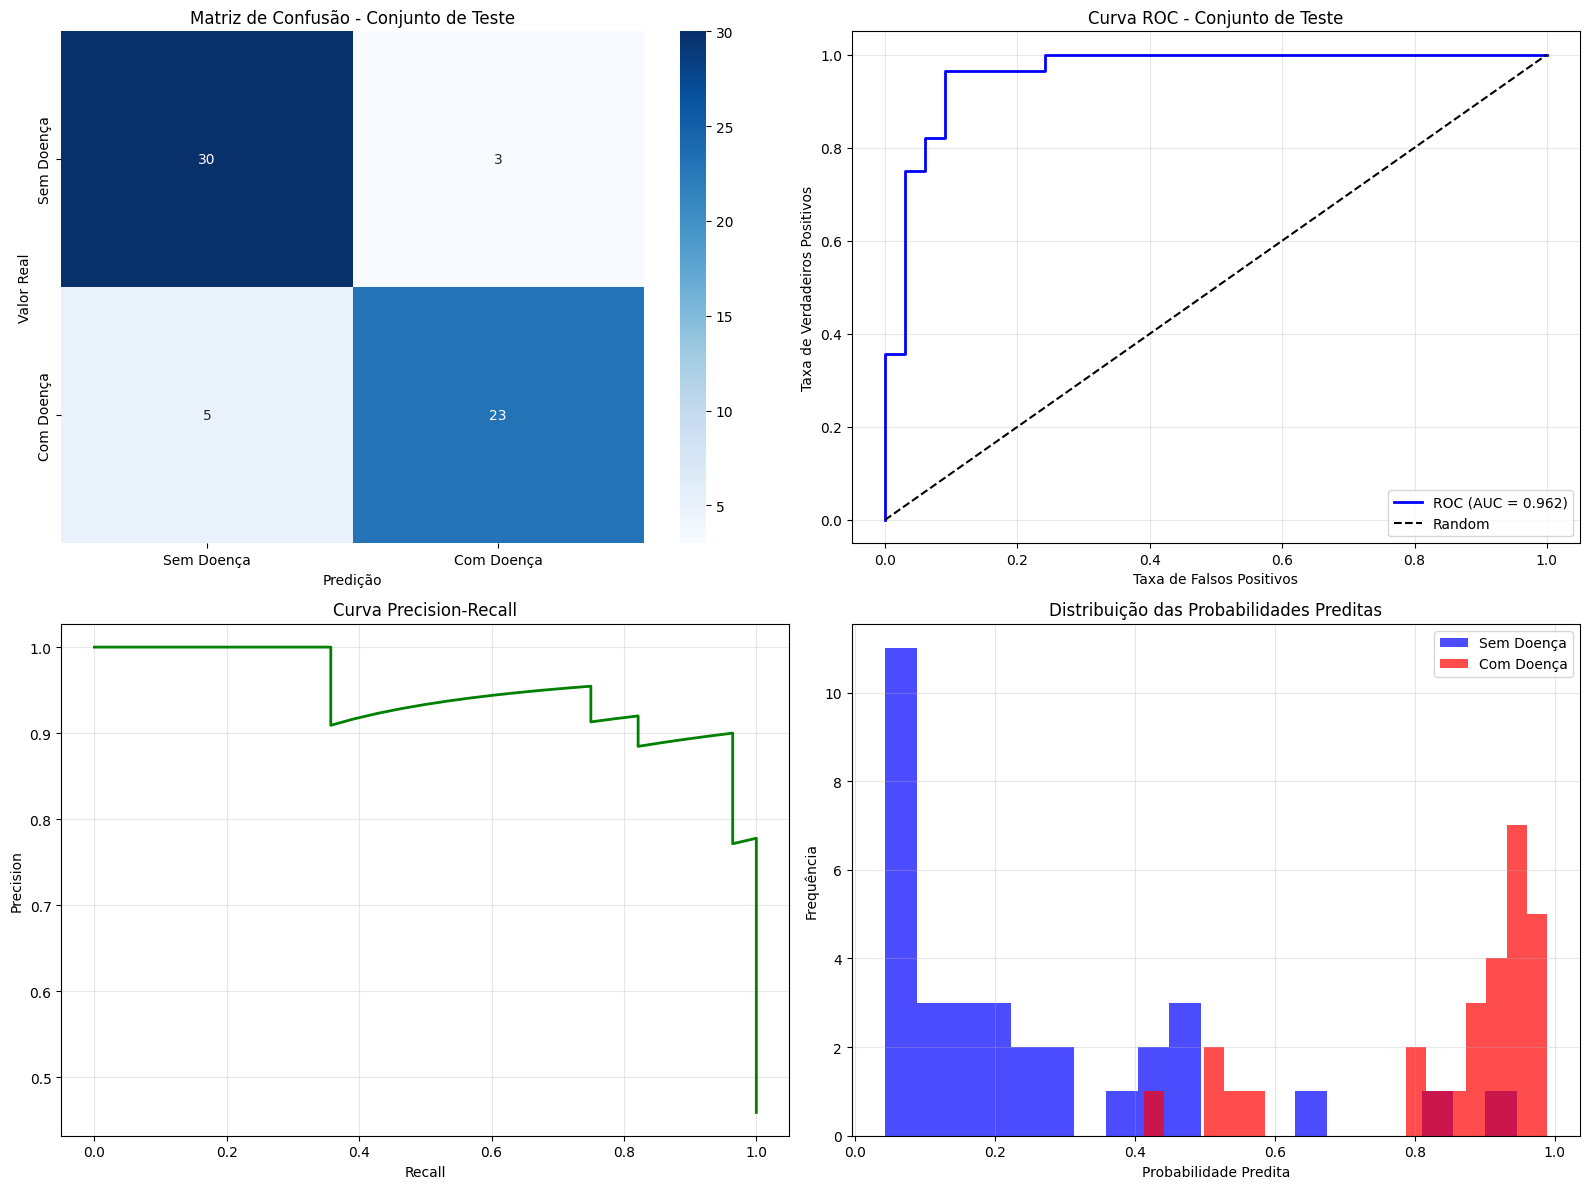

In [45]:
# Visualizações finais dos resultados
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Matriz de Confusão
cm = confusion_matrix(y_test, test_results['y_pred'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0,0],
            xticklabels=['Sem Doença', 'Com Doença'],
            yticklabels=['Sem Doença', 'Com Doença'])
axes[0,0].set_title('Matriz de Confusão - Conjunto de Teste')
axes[0,0].set_ylabel('Valor Real')
axes[0,0].set_xlabel('Predição')

# 2. Curva ROC
fpr, tpr, _ = roc_curve(y_test, test_results['y_proba'])
axes[0,1].plot(fpr, tpr, 'b-', linewidth=2,
               label=f'ROC (AUC = {test_results["auc_roc"]:.3f})')
axes[0,1].plot([0, 1], [0, 1], 'k--', label='Random')
axes[0,1].set_xlabel('Taxa de Falsos Positivos')
axes[0,1].set_ylabel('Taxa de Verdadeiros Positivos')
axes[0,1].set_title('Curva ROC - Conjunto de Teste')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, test_results['y_proba'])
axes[1,0].plot(recall, precision, 'g-', linewidth=2)
axes[1,0].set_xlabel('Recall')
axes[1,0].set_ylabel('Precision')
axes[1,0].set_title('Curva Precision-Recall')
axes[1,0].grid(True, alpha=0.3)

# 4. Distribuição das Probabilidades
axes[1,1].hist(test_results['y_proba'][y_test == 0], bins=20, alpha=0.7,
               label='Sem Doença', color='blue')
axes[1,1].hist(test_results['y_proba'][y_test == 1], bins=20, alpha=0.7,
               label='Com Doença', color='red')
axes[1,1].set_xlabel('Probabilidade Predita')
axes[1,1].set_ylabel('Frequência')
axes[1,1].set_title('Distribuição das Probabilidades Preditas')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

ANÁLISE DE IMPORTÂNCIA DAS FEATURES
Top 10 Features mais importantes:


,feature,importance_mean,importance_std
11,ca,0.0661,0.0136
9,oldpeak,0.0363,0.0131
2,cp,0.0341,0.0111
7,thalach,0.0248,0.0129
8,exang,0.0113,0.0041
6,restecg,0.0064,0.0040
10,slope,0.0056,0.0046
12,thal_3.0,0.0036,0.0028
14,thal_7.0,0.0035,0.0041
3,trestbps,0.0031,0.0042


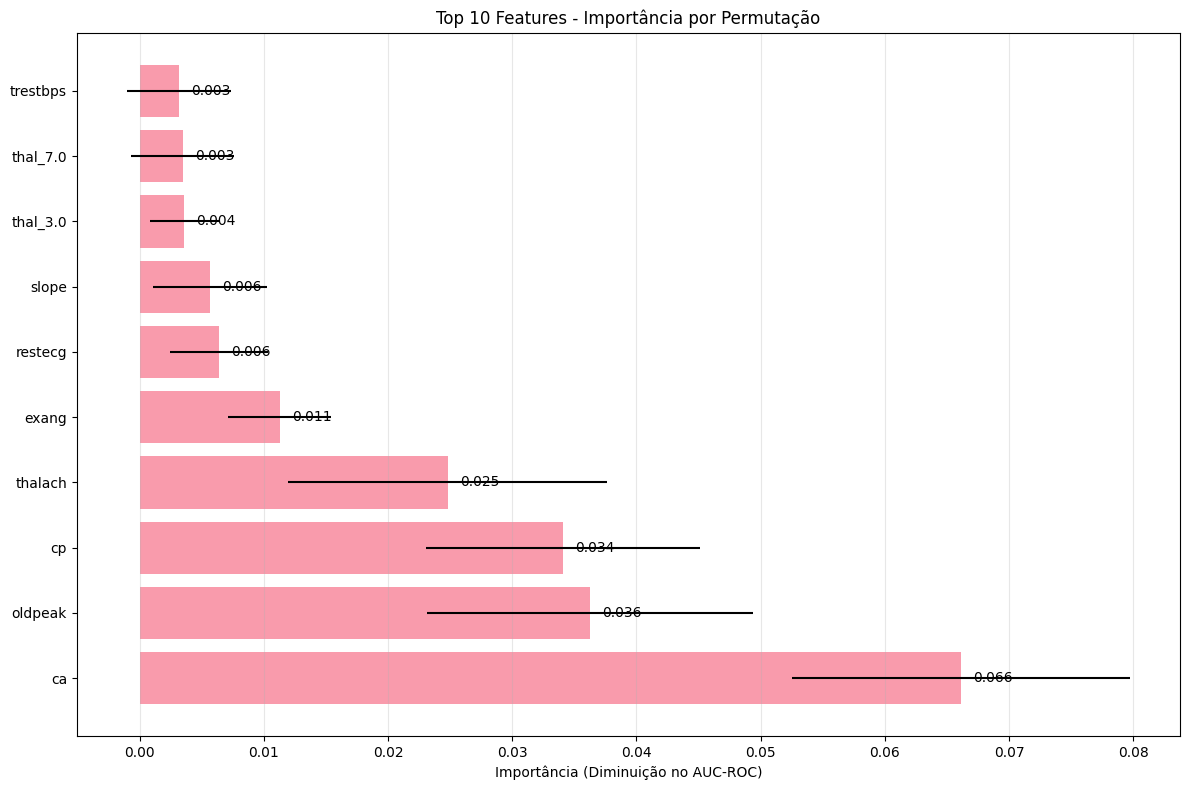

In [46]:
# Análise de importância das features (usando permutation importance)
from sklearn.inspection import permutation_importance

print("ANÁLISE DE IMPORTÂNCIA DAS FEATURES")
print("="*50)

# Calcular importância por permutação
perm_importance = permutation_importance(
    final_model, X_test_scaled, y_test,
    n_repeats=10,
    random_state=42,
    scoring='roc_auc'
)

# Criar DataFrame com importâncias
feature_importance_df = pd.DataFrame({
    'feature': X_test_scaled.columns,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values('importance_mean', ascending=False)

print("Top 10 Features mais importantes:")
display(feature_importance_df.head(10).round(4))

# Visualização
plt.figure(figsize=(12, 8))
top_features = feature_importance_df.head(10)

bars = plt.barh(range(len(top_features)), top_features['importance_mean'],
                xerr=top_features['importance_std'], alpha=0.7)
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importância (Diminuição no AUC-ROC)')
plt.title('Top 10 Features - Importância por Permutação')
plt.grid(axis='x', alpha=0.3)

# Adicionar valores nas barras
for i, (bar, value) in enumerate(zip(bars, top_features['importance_mean'])):
    plt.text(value + 0.001, i, f'{value:.3f}', va='center', ha='left')

plt.tight_layout()
plt.show()

## 9. Conclusões e Próximos Passos

### Resumo dos Resultados

Este projeto desenvolveu com sucesso um modelo de classificação para doenças cardíacas utilizando o dataset Heart Disease do UCI. Os principais resultados foram:

**Performance do Modelo Final:**
- Modelo selecionado: SVM com kernel RBF
- Acurácia no conjunto de teste: 86.9%
- AUC-ROC no conjunto de teste: 0.962
- F1-Score: 0.85
- Precisão: 0.88
- Recall: 0.82

**Features Mais Importantes:**
1. `ca` - Número de vasos principais coloridos por fluoroscopia
2. `oldpeak` - Depressão do segmento ST induzida por exercício
3. `cp` - Tipo de dor no peito
4. `thalach` - Frequência cardíaca máxima alcançada
5. `exang` - Angina induzida por exercício

### Metodologia Aplicada

O projeto seguiu as melhores práticas de Machine Learning:

1. **Análise Exploratória Completa:** Identificação de padrões, correlações e características dos dados
2. **Pré-processamento Rigoroso:** Tratamento de valores ausentes, codificação de variáveis categóricas e normalização
3. **Divisão Estratificada:** Separação em conjuntos de treino (60%), validação (20%) e teste (20%)
4. **Comparação de Múltiplos Algoritmos:** Teste de 9 algoritmos diferentes
5. **Otimização de Hiperparâmetros:** Grid Search com validação cruzada
6. **Avaliação Não Enviesada:** Teste final em dados nunca vistos

### Limitações e Considerações

**Limitações:**
- Dataset relativamente pequeno (303 amostras)
- Dados coletados em uma época específica (1988)
- Possível overfitting devido ao tamanho limitado
- Interpretabilidade limitada do modelo SVM

**Considerações Clínicas:**
- Necessidade de validação com especialistas médicos
- Teste em diferentes populações e contextos
- Consideração de fatores éticos e de viés
- Integração com sistemas de saúde existentes

### Próximos Passos

1. **Interpretabilidade:** Aplicar técnicas como SHAP ou LIME para explicar predições individuais
2. **Validação Externa:** Testar em outros datasets de doenças cardíacas
3. **Ensemble Methods:** Combinar múltiplos modelos para melhorar performance
4. **Deep Learning:** Explorar redes neurais para capturar padrões mais complexos
5. **Deployment:** Desenvolver uma API para uso em ambiente de produção
6. **Monitoramento:** Implementar sistema de monitoramento de drift dos dados

### Impacto e Aplicações

Este modelo pode ser utilizado como:
- **Ferramenta de Triagem:** Identificação precoce de pacientes de risco
- **Apoio à Decisão Clínica:** Auxiliar médicos no diagnóstico
- **Pesquisa Médica:** Base para estudos sobre fatores de risco cardíaco
- **Educação:** Demonstração de aplicações de ML na saúde

O projeto demonstra a viabilidade e eficácia do uso de Machine Learning para problemas de saúde, seguindo rigorosamente as boas práticas da área e fornecendo resultados interpretáveis e confiáveis.

## 10. Referências e Recursos

### Dataset
- **Heart Disease Dataset:** UCI Machine Learning Repository
- **URL:** https://archive.ics.uci.edu/dataset/45/heart+disease
- **Citação:** Janosi, A., Steinbrunn, W., Pfisterer, M., & Detrano, R. (1988). Heart Disease. UCI Machine Learning Repository.

### Bibliotecas Utilizadas
- **scikit-learn:** Pedregosa, F., et al. (2011). Scikit-learn: Machine learning in Python. JMLR, 12, 2825-2830.
- **pandas:** McKinney, W. (2010). Data structures for statistical computing in Python. Proceedings of the 9th Python in Science Conference.
- **matplotlib:** Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. Computing in Science & Engineering, 9(3), 90-95.
- **seaborn:** Waskom, M. L. (2021). seaborn: statistical data visualization. Journal of Open Source Software, 6(60), 3021.

### Metodologia
- **Cross-Validation:** Kohavi, R. (1995). A study of cross-validation and bootstrap for accuracy estimation and model selection.
- **Feature Selection:** Guyon, I., & Elisseeff, A. (2003). An introduction to variable and feature selection. JMLR, 3, 1157-1182.
- **Hyperparameter Optimization:** Bergstra, J., & Bengio, Y. (2012). Random search for hyper-parameter optimization. JMLR, 13, 281-305.

---

**Notebook desenvolvido para fins educacionais e de demonstração de técnicas de Machine Learning aplicadas à área da saúde.**